In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import decomposition, preprocessing, svm 

import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [2]:
# Load dataset
heart_data = pd.read_csv("data//heart.csv")
heart_data.tail()

# 1 age: age in years 
# 2 sex: sex (1 = male; 0 = female) 
# 3 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 
# 4 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
# 5 chol: serum cholestoral in mg/dl 
# 6 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 7 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
# 8 thalach: maximum heart rate achieved
# 9 exang: exercise induced angina (1 = yes; 0 = no) -- Exercise can cause an angina attack in someone with heart disease  
# 10 oldpeak = ST depression induced by exercise relative to rest 
# 11 slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
# 12 ca: number of major vessels (0-3) colored by flourosopy 
# 13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
# 14 target: the predicted attribute -- diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% vessel diameter narrowing -- Value 1: > 50% vessel diameter narrowing 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
# Shape 
print(heart_data.shape)

(303, 14)


In [4]:
# Statistical description
heart_data.describe()

# From this, can tell that there is no missing data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Class distribution to see how many are prone to heart attacks by the 'num' feature
print(heart_data.groupby('target').size())

target
0    138
1    165
dtype: int64


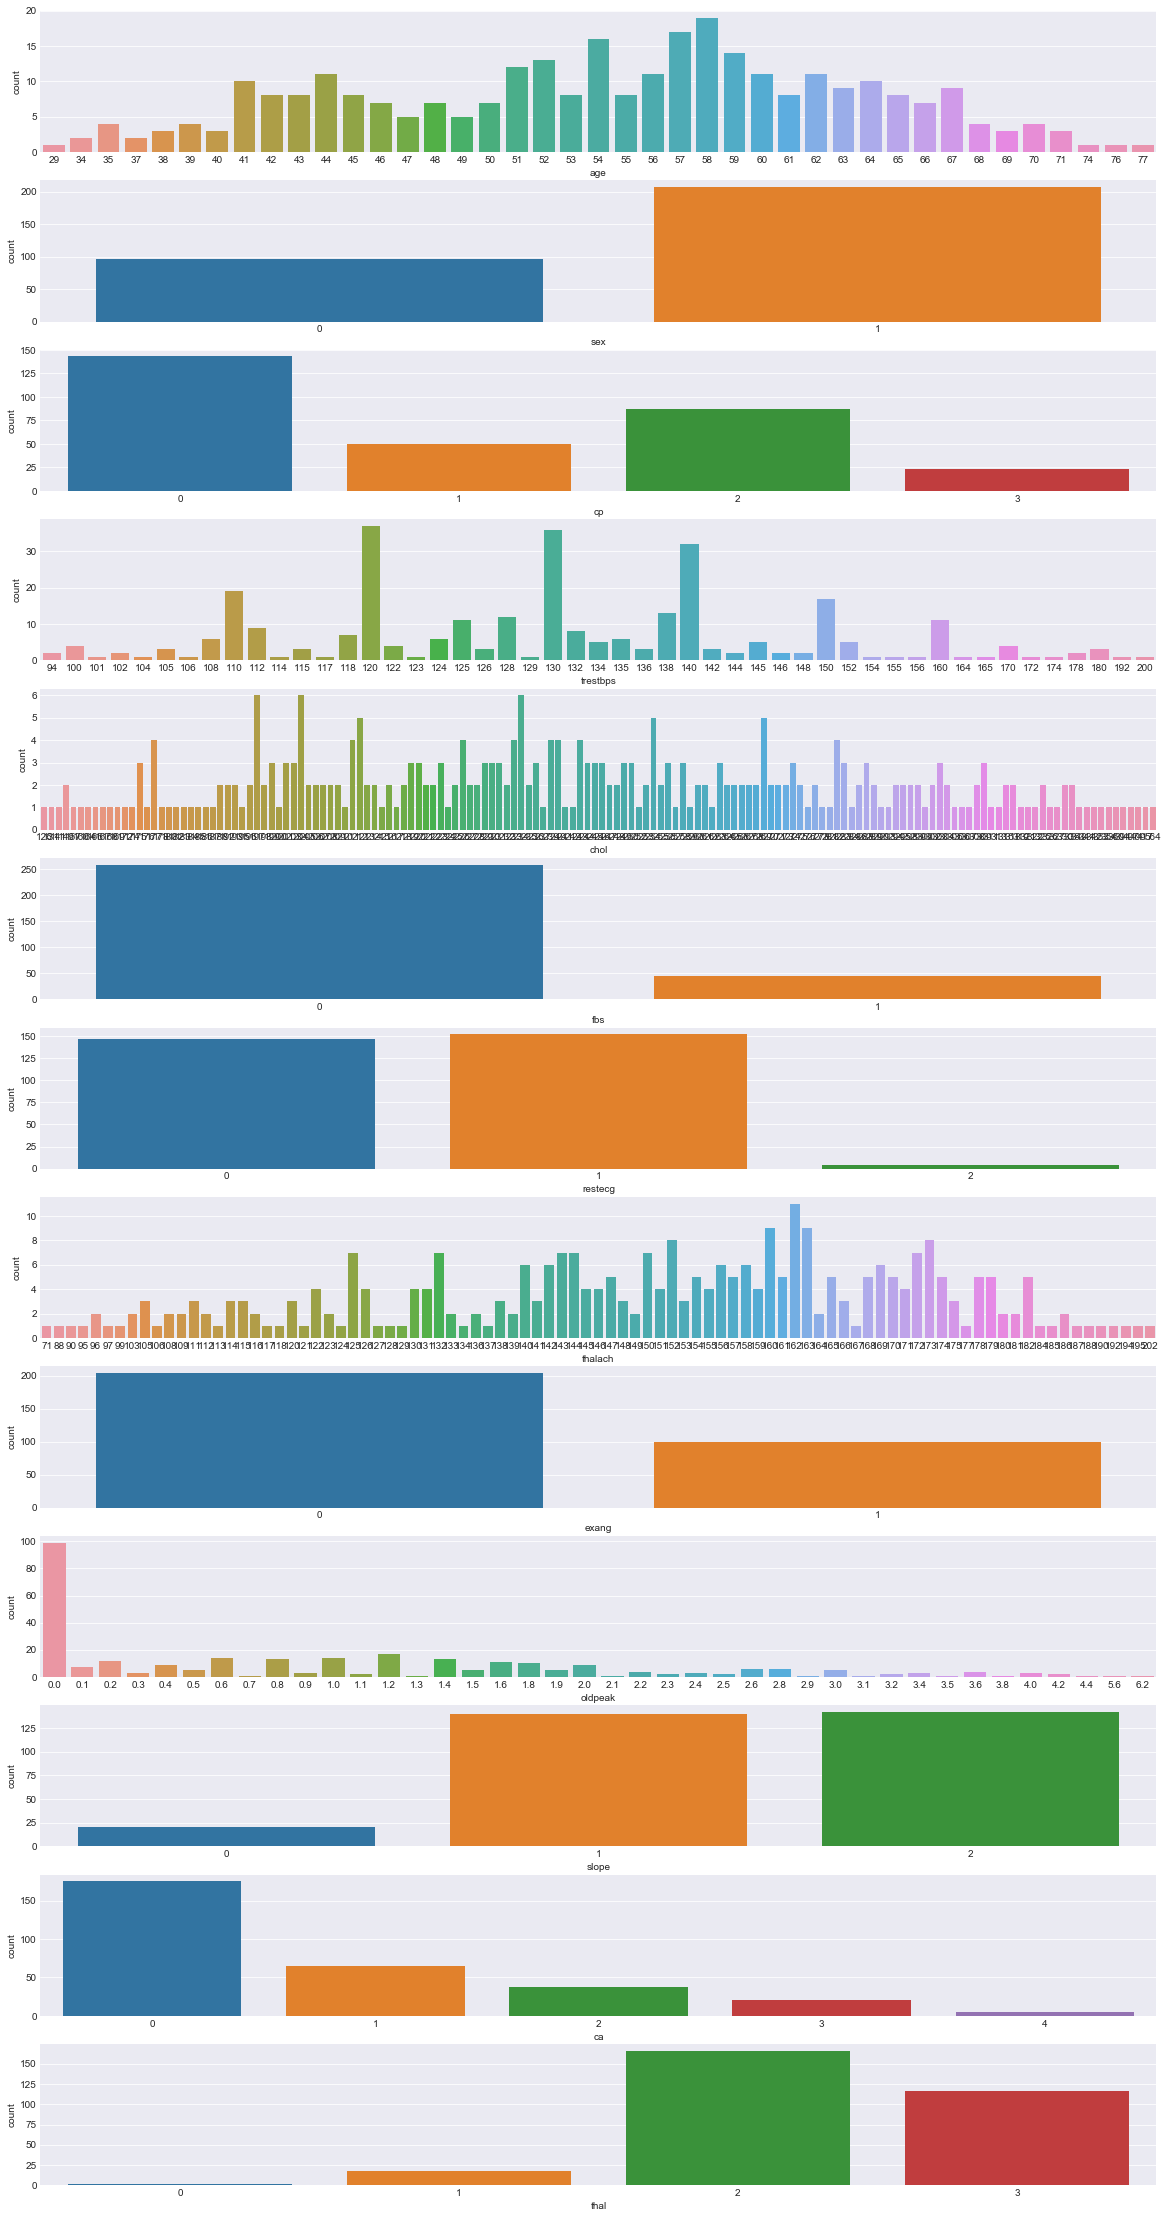

In [6]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13) = plt.subplots(13,1,figsize=(20,40))
sns.countplot(x='age', data=heart_data, ax=ax1)
sns.countplot(x='sex', data=heart_data, ax=ax2)
sns.countplot(x='cp', data=heart_data, ax=ax3)
sns.countplot(x='trestbps', data=heart_data, ax=ax4)
sns.countplot(x='chol', data=heart_data, ax=ax5)
sns.countplot(x='fbs', data=heart_data, ax=ax6)
sns.countplot(x='restecg', data=heart_data, ax=ax7)
sns.countplot(x='thalach', data=heart_data, ax=ax8)
sns.countplot(x='exang', data=heart_data, ax=ax9)
sns.countplot(x='oldpeak', data=heart_data, ax=ax10)
sns.countplot(x='slope', data=heart_data, ax=ax11)
sns.countplot(x='ca', data=heart_data, ax=ax12)
sns.countplot(x='thal', data=heart_data, ax=ax13)

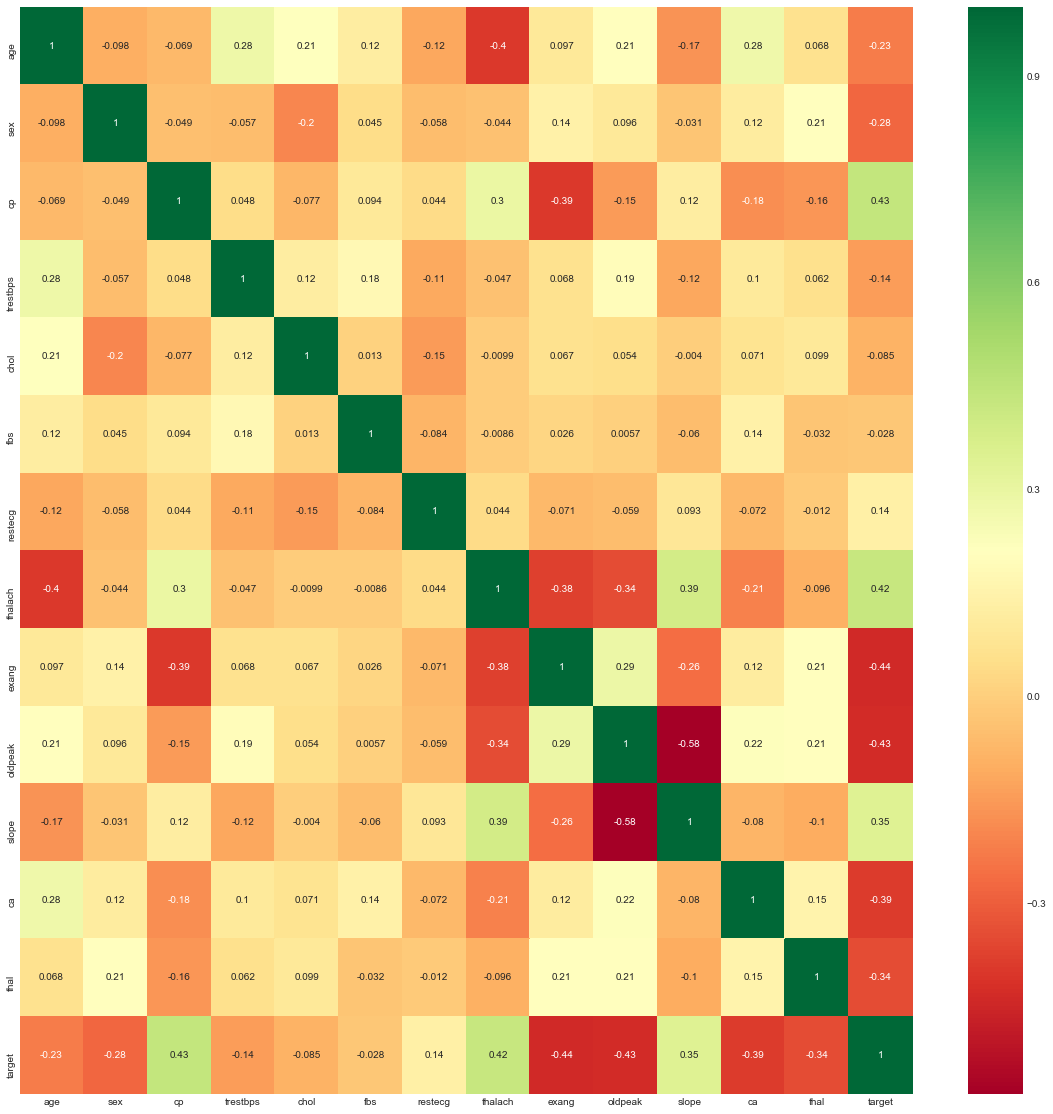

In [7]:
# Features
X = heart_data.iloc[:,0:13]  
# Classes / target
y = heart_data.iloc[:,-1]    

# Get correlations of each features in dataset
corrmat = heart_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Last row i.e target, 
# target is correlated with other features, 
# the features most highly correlated with target are: 
# -- exang (-0.44)
# -- cp (0.43)
# -- oldpeak (-0.43) 
# -- thalach (0.42)
# -- ca (-0.39)

# the features least correlated with target are:
# -- fbs (-0.028)
# -- chol (-0.085)

In [8]:
# Delete the fbs and chol columns
del heart_data['fbs']
del heart_data['chol']

In [9]:
heart_data.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


In [10]:
#Shuffle the data 
np.random.seed(18)
heart_data_shuffle = heart_data.iloc[np.random.permutation(len(heart_data))]

In [11]:
# Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn
all_data = heart_data_shuffle[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal', 'target']].values

# Create array of only the feature data 
features = heart_data_shuffle[['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']].values

# Separate array to contain target
targets = heart_data_shuffle['target'].values

# Also need array of the feature names - this will help later when exploring the data
feature_names = ['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal']

# print the features array of feature data
features

array([[65.,  1.,  0., ...,  2.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  1.,  3.],
       [56.,  0.,  0., ...,  1.,  2.,  3.],
       ...,
       [64.,  0.,  0., ...,  1.,  2.,  2.],
       [52.,  1.,  0., ...,  2.,  2.,  3.],
       [57.,  0.,  0., ...,  1.,  0.,  3.]])

In [12]:
# Save the new heart attack data csv
df = pd.DataFrame(all_data, columns = ['age','sex','cp','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

df.to_csv('new_heart_attack.csv')

In [13]:
# Normalize the attribute data using preprocessing.StandardScaler() 
# Normalization means adjusting values measured on different scales to a common scale
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

# scaler has calculated the mean and scaling factor to standardize each feature

array([[ 1.17277425,  0.68100522, -0.93851463, ...,  0.97635214,
         1.24459328, -2.14887271],
       [-0.04040284,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       ...,
       [ 1.06248543, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328, -0.51292188],
       [-0.26098049,  0.68100522, -0.93851463, ...,  0.97635214,
         1.24459328,  1.12302895],
       [ 0.29046364, -1.46841752, -0.93851463, ..., -0.64911323,
        -0.71442887,  1.12302895]])

In [14]:
scaler_mean = scaler.mean_
scaler_mean

array([ 54.36633663,   0.68316832,   0.9669967 , 131.62376238,
         0.52805281, 149.64686469,   0.32673267,   1.03960396,
         1.39933993,   0.72937294,   2.31353135])

In [15]:
scaler_scale = scaler.scale_  
scaler_scale

array([ 9.06710164,  0.46524119,  1.03034803, 17.50917807,  0.52499112,
       22.86733258,  0.46901859,  1.15915747,  0.61520843,  1.0209175 ,
        0.61126531])

In [16]:
# Split the data into the sets for training and testing 
import numpy
from sklearn.model_selection import train_test_split
    
seed = 18

(training_inputs,
 testing_inputs,
 training_targets,
 testing_targets) = train_test_split(features_scaled, 
                                     targets, 
                                     test_size=0.20, 
                                     train_size=0.80, 
                                     random_state=seed)


In [17]:
# DecisionTreeClassifier, fit to training data
clf= DecisionTreeClassifier(random_state=seed)

# Train the classifier on the training set
clf.fit(training_inputs, training_targets)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=18,
            splitter='best')

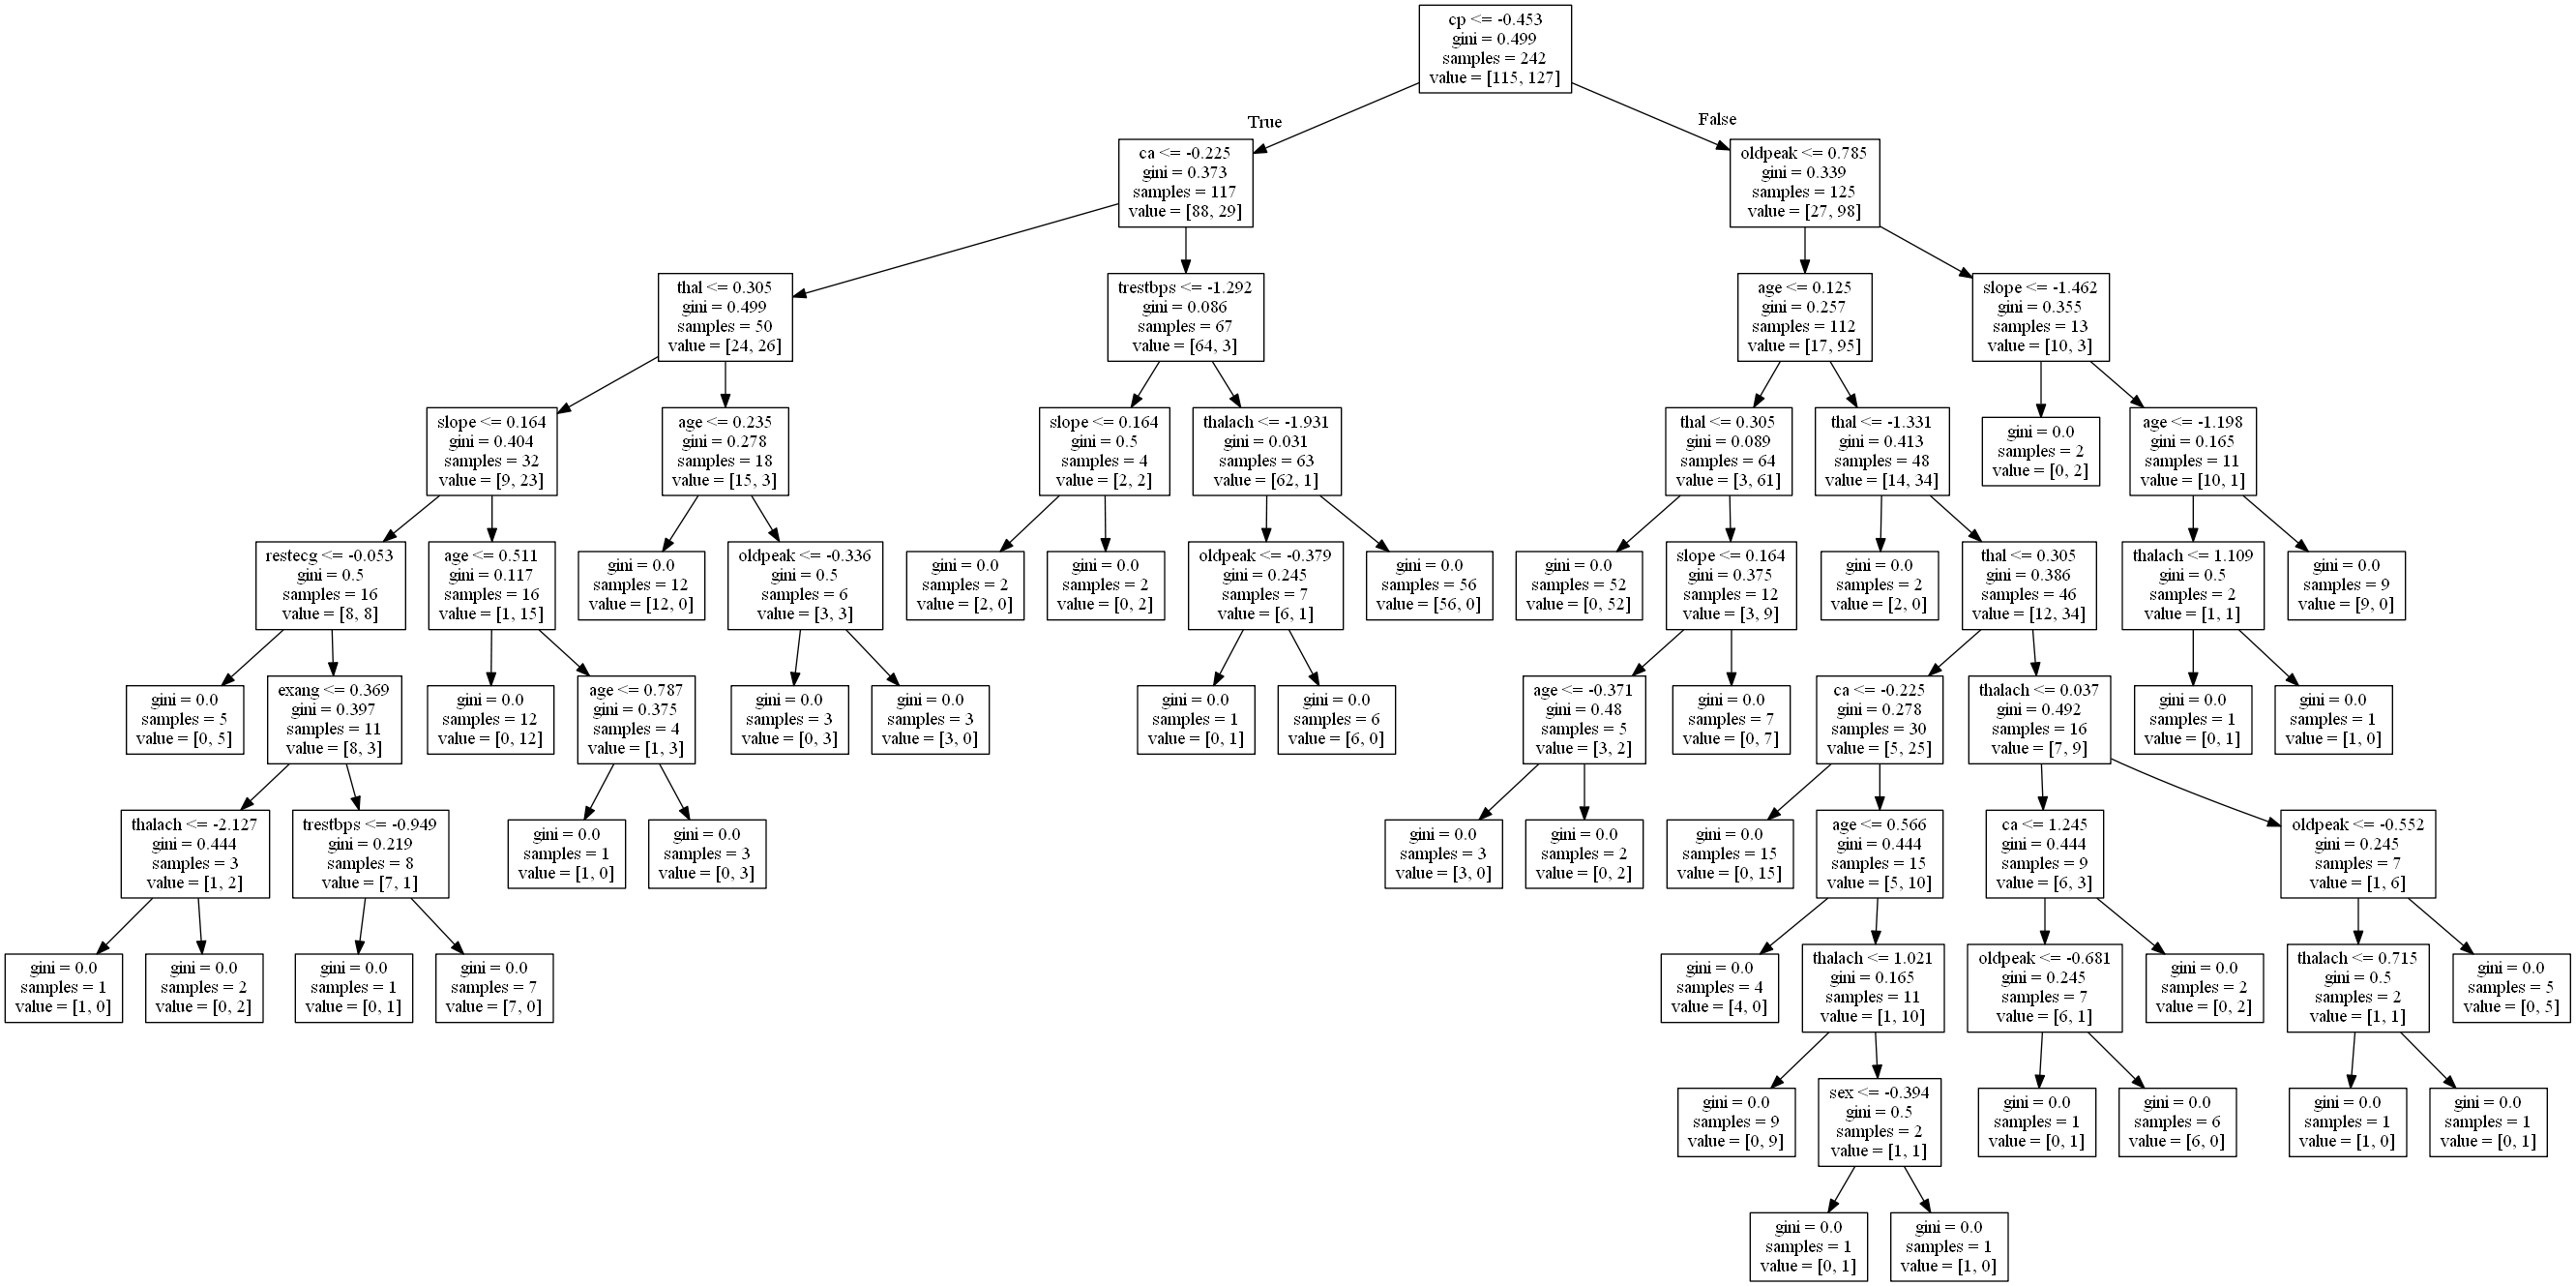

In [18]:
# Display the resulting decision tree
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [19]:
# Using test data to measure the accuracy of the decision tree model 
clf.score(testing_inputs, testing_targets)

0.7540983606557377

In [20]:
# Using K-Fold cross validation to measure of your model's accuracy (K=10)
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
cv_scores.mean()

0.7482610307749351

In [21]:
# Using RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=seed)
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
cv_scores.mean()

0.7986132740081573

In [22]:
# SVM
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

cv_scores = cross_val_score(svc, features_scaled, targets, cv=10)

cv_scores.mean()

0.8353170189098998

In [23]:
# KNeighborsClassifier
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)

cv_scores.mean()

0.8348720800889877

In [24]:
# Trying different values of K for KNN 
# Using for loop to run KNN with K values ranging from 1 to 10 
# See if K makes a substantial difference. 

for i in range(1, 10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
    print (i, cv_scores.mean())
    
# The best in this range is k=8

1 0.7561475713756025
2 0.7689358546533185
3 0.8287578791249537
4 0.8217538005190953
5 0.8348720800889877
6 0.84421950315165
7 0.841431219873934
8 0.8514386355209492
9 0.8348720800889877


In [25]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, features_minmax, targets, cv=10)

cv_scores.mean()

0.7882832777159807

In [26]:
#GaussianNB
clf = GaussianNB()
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
cv_scores.mean()

0.8217463848720801

In [27]:
# Logistic Regression 
clf = LogisticRegression()
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
cv_scores.mean()

0.832091212458287

In [28]:
# LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf, features_scaled, targets, cv=10)
cv_scores.mean()

0.8319836855765665

In [29]:
# DecisionTreeClassifier: 0.7689432703003337
# RandomForestClassifier: 0.8086206896551724
# SVM: 0.8353170189098998
# KNeighborsClassifier(k=10): 0.8348720800889877, when k=8: 0.8514386355209492
# Naive Bayes: 0.7882832777159807
# GaussianNB: 0.8217463848720801
# Logistic Regression: 0.832091212458287
# LinearDiscriminantAnalysis: 0.8319836855765665

# KNeighborsClassifier(k=8) is the best algorithm.

In [30]:
# Make predictions with testing data
knc = neighbors.KNeighborsClassifier(n_neighbors=8)

knc.fit(training_inputs, training_targets)
predictions = knc.predict(testing_inputs)
print("Accuracy:")
print(accuracy_score(testing_targets, predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(testing_targets, predictions))
print()
print("Classification report:")
print(classification_report(testing_targets, predictions))

Accuracy:
0.8524590163934426

Confusion matrix:
[[18  5]
 [ 4 34]]

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.78      0.80        23
          1       0.87      0.89      0.88        38

avg / total       0.85      0.85      0.85        61



In [31]:
import pickle

pickle.dump(knc, open('models//trained_heart_attack_model.pkl', 'wb'))

In [32]:
knc_model = pickle.load(open('models//trained_heart_attack_model.pkl', 'rb'))

knc_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [33]:
print(classification_report(testing_targets, knc_model.predict(testing_inputs)))
# To prove that it is the same model that was saved (dumped) and loaded

             precision    recall  f1-score   support

          0       0.82      0.78      0.80        23
          1       0.87      0.89      0.88        38

avg / total       0.85      0.85      0.85        61



In [34]:
#--- Find the error rate on the training set to check accuracy of our models predictions

# Pass in the y values which are the correct answers from the training data set
# Then we call svc_model.predict function on training features/inputs
# This will generate a prediction using our training model for each entry in the training data set
# scikit-learn will compare the predictions to the expected answers and tell us how close we are
mse = mean_absolute_error(training_targets, knc_model.predict(training_inputs))
print("Training Set Mean Absolute Error: %.4f" % mse)


#--- Find the error rate on the test set

# Do same calculation for the test data set but pass in the test data instead of the training data
mse = mean_absolute_error(testing_targets, knc_model.predict(testing_inputs))
print("Test Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.1198
Test Set Mean Absolute Error: 0.1475


In [35]:
# Inputs
# age = float(input("Enter age: "))
# sex = float(input("Enter 1 = male; 0 = female: "))
# cp = float(input("Enter cp (chest pain type) -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic: "))
# trestbps = float(input("Enter trestbps (resting blood pressure in mm Hg on admission to the hospital): "))
# restecg = float(input("Enter restecg (resting electrocardiographic results) -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria: "))
# thalach = float(input("Enter thalach (maximum heart rate achieved): "))
# exang = float(input("Enter exang (exercise induced angina) (1 = yes; 0 = no): "))
# oldpeak = float(input("Enter oldpeak (ST depression induced by exercise relative to rest): "))
# slope = float(input("Enter slope (the slope of the peak exercise ST segment) -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping: "))
# ca = float(input("Enter ca (number of major vessels (0-3) colored by flourosopy): "))
# thal = float(input("Enter thal (3 = normal; 6 = fixed defect; 7 = reversable defect): "))

age = 47.0
sex = 1.0
cp = 2.0
trestbps = 138.0
restecg = 0.0
thalach = 156.0
exang = 0.0
oldpeak = 0.0  
slope = 2.0
ca = 0.0
thal = 2.0

# target: the predicted attribute -- diagnosis of heart disease (angiographic disease status) 
# -- 0: < 50% vessel diameter narrowing (Low chance of heart attack/disease)
# -- 1: > 50% vessel diameter narrowing (High chance of heart attack/disease)

# Use the same scaler factors on the new data
scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

data = np.array([[age, sex, cp, trestbps, restecg, thalach, exang, oldpeak, slope, ca, thal]])
data_scaled = scaler.transform(data)
data_scaled

array([[-0.81242462,  0.68100522,  1.00257707,  0.36416545, -1.00583187,
         0.27782582, -0.69663055, -0.89686172,  0.97635214, -0.71442887,
        -0.51292188]])

In [36]:
# Make a prediction against prediction features
prediction = knc_model.predict(data_scaled)
print(prediction)

if prediction == 0:
    print("Low chance of heart attack/disease")
elif prediction == 1:
    print("High chance of heart attack/disease")
else:
    print("Unable to make a prediction")

[1]
High chance of heart attack/disease
